In [1]:
from pathlib import Path
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from maxent_gan.utils.general_utils import ROOT_DIR


sns.set_theme()

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("lines", linewidth=3)
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title



2022-05-09 11:45:00.303657: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
def ema(s, n):
    """
    returns an n period exponential moving average for
    the time series s

    s is a list ordered from oldest (index 0) to most
    recent (index -1)
    n is an integer

    returns a numeric array of the exponential
    moving average
    """
    s = np.array(s)
    ema = []
    j = 1

    #get n sma first and calculate the next n period ema
    sma = sum(s[:n]) / n
    multiplier = 2 / float(1 + n)
    ema.append(sma)

    #EMA(current) = ( (Price(current) - EMA(prev) ) x Multiplier) + EMA(prev)
    ema.append(( (s[n] - sma) * multiplier) + sma)

    #now calculate the rest of the values
    for i in s[n+1:]:
        tmp = ( (i - ema[j]) * multiplier) + ema[j]
        j = j + 1
        ema.append(tmp)

    return ema

In [3]:
model = 'sngan_ns'
model = 'snresnet'
methods_map = {
    #'gd': 'GD',
    'ula': 'ULA',
    'mala': 'MALA',
    'isir': 'i-SIR',
    'ex2mcmc': r'Ex$^2$MCMC'
}

log_dir = Path(ROOT_DIR, 'log', 'dumb_feature_DiscriminatorTarget')
every = 50

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


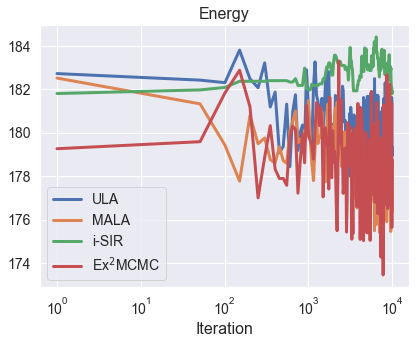

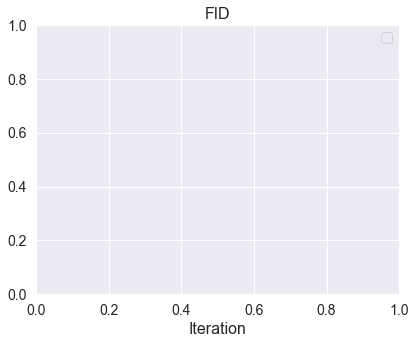

In [4]:
figs, axs = [], []
for _ in range(2):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)

    figs.append(fig)
    axs.append(ax)

for method in methods_map.keys():
    log_path = Path(log_dir, f'{model}_{method}')
    energy = np.loadtxt(Path(log_path, 'callback_results.txt'))[0]
    #energy = ema(energy, 5)
    axs[0].plot(np.arange(1, len(energy)*every+1, every), energy, label=methods_map[method])

    # fids = np.loadtxt(Path(log_path, 'fid_values.txt'))
    # axs[1].plot(np.arange(0, len(fids)*every, every), fids, label=methods_map[method])

for ax in axs:
    ax.legend()
    ax.set_xlabel('Iteration')

axs[0].set_title('Energy')
axs[0].set_xscale('log', base=10)
# axs[0].set_xticks(np.arange(1, len(energy)*every+1, every)[::5], np.arange(1, len(energy)*every+1, every)[::5])
axs[1].set_title('FID')
for fig in figs:
    fig.tight_layout()
    
figs[0].savefig(Path(ROOT_DIR, 'log', f'{model}_energy.png'))
figs[1].savefig(Path(ROOT_DIR, 'log', f'{model}_fid_1k.png'))


In [23]:
model = 'wgan_gp'

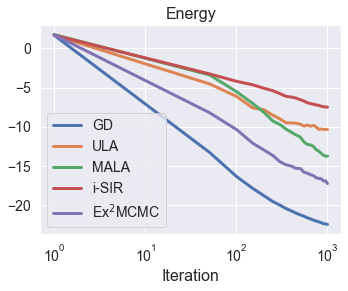

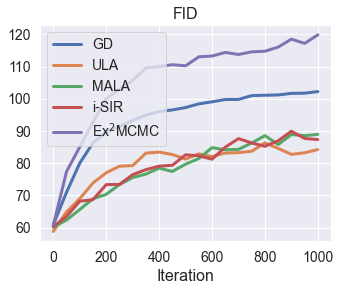

In [5]:
figs, axs = [], []
for _ in range(2):
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111)

    figs.append(fig)
    axs.append(ax)

axs[0].set_title('Energy')
axs[0].set_xscale('log', base=10)
# axs[0].set_xticks(np.arange(1, len(energy)*every+1, every)[::5], np.arange(1, len(energy)*every+1, every)[::5])
axs[1].set_title('FID')
for fig in figs:
    fig.tight_layout()

for method in methods_map.keys():
    log_path = Path(log_dir, f'{model}_{method}')
    energy = np.loadtxt(Path(log_path, 'callback_results.txt'))[0]
    axs[0].plot(np.arange(1, len(energy)*every+1, every), energy, label=methods_map[method])

    fids = np.loadtxt(Path(log_path, 'fid_values.txt'))
    axs[1].plot(np.arange(0, len(fids)*every, every), fids, label=methods_map[method])

for ax in axs:
    ax.legend()
    ax.set_xlabel('Iteration')


    
figs[0].savefig(Path(ROOT_DIR, 'log', f'{model}_energy.png'))
figs[1].savefig(Path(ROOT_DIR, 'log', f'{model}_fid_1k.png'))

In [6]:
model = 'mmc_sngan'
methods_map = {
    'gd': 'GD',
    'ula': 'ULA',
    'mala': 'MALA',
    # 'isir': 'i-SIR',
    # 'ex2mcmc': r'Ex$^2$MCMC'
}

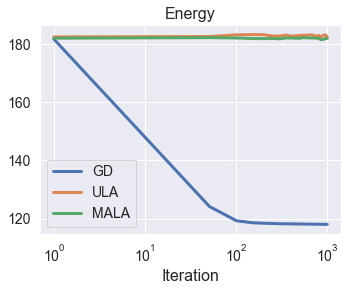

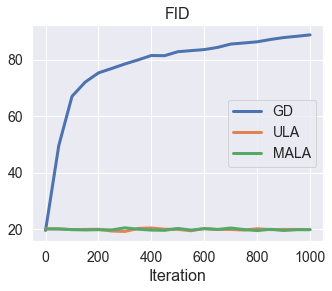

In [7]:
figs, axs = [], []
for _ in range(2):
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111)

    figs.append(fig)
    axs.append(ax)

axs[0].set_title('Energy')
axs[0].set_xscale('log', base=10)
# axs[0].set_xticks(np.arange(1, len(energy)*every+1, every)[::5], np.arange(1, len(energy)*every+1, every)[::5])
axs[1].set_title('FID')
for fig in figs:
    fig.tight_layout()

for method in methods_map.keys():
    log_path = Path(log_dir, f'{model}_{method}')
    energy = np.loadtxt(Path(log_path, 'callback_results.txt'))[0]
    axs[0].plot(np.arange(1, len(energy)*every+1, every), energy, label=methods_map[method])

    fids = np.loadtxt(Path(log_path, 'fid_values.txt'))
    axs[1].plot(np.arange(0, len(fids)*every, every), fids, label=methods_map[method])

for ax in axs:
    ax.legend()
    ax.set_xlabel('Iteration')


    
figs[0].savefig(Path(ROOT_DIR, 'log', f'{model}_energy.png'))
figs[1].savefig(Path(ROOT_DIR, 'log', f'{model}_fid_1k.png'))

In [21]:
model = 'dcgan'
methods_map = {
    'gd': 'GD',
    'ula': 'ULA',
    'mala': 'MALA',
    'isir': 'i-SIR',
    'ex2mcmc': r'Ex$^2$MCMC'
}

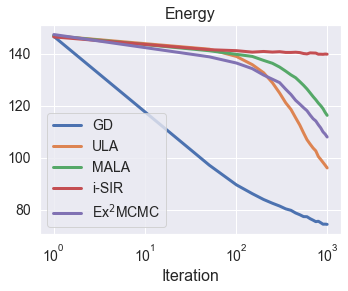

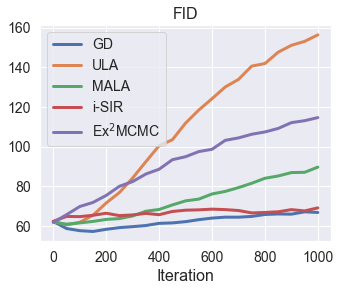

In [22]:
figs, axs = [], []
for _ in range(2):
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(111)

    figs.append(fig)
    axs.append(ax)

axs[0].set_title('Energy')
axs[0].set_xscale('log', base=10)
# axs[0].set_xticks(np.arange(1, len(energy)*every+1, every)[::5], np.arange(1, len(energy)*every+1, every)[::5])
axs[1].set_title('FID')
for fig in figs:
    fig.tight_layout()

for method in methods_map.keys():
    log_path = Path(log_dir, f'{model}_{method}')
    energy = np.loadtxt(Path(log_path, 'callback_results.txt'))[0]
    axs[0].plot(np.arange(1, len(energy)*every+1, every), energy, label=methods_map[method])

    fids = np.loadtxt(Path(log_path, 'fid_values.txt'))
    axs[1].plot(np.arange(0, len(fids)*every, every), fids, label=methods_map[method])

for ax in axs:
    ax.legend()
    ax.set_xlabel('Iteration')


    
figs[0].savefig(Path(ROOT_DIR, 'log', f'{model}_energy.png'))
figs[1].savefig(Path(ROOT_DIR, 'log', f'{model}_fid_1k.png'))